In [98]:
import pandas as pd
import datetime as dt

# Clean & check 'orders'

In [3]:
orders = pd.read_csv("data/muesli_raw_orders.csv", header=1)

In [4]:
orders.columns = orders.columns.str.lower()

In [5]:
cols = orders.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
orders.columns = cols

In [6]:
orders['order_date'] = pd.to_datetime(orders['order_date'], format="%d/%m/%Y")

In [7]:
orders.drop_duplicates(subset="order_id", inplace=True)

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5009 entries, 0 to 9988
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           5009 non-null   int64         
 1   order_id        5009 non-null   object        
 2   order_date      5009 non-null   datetime64[ns]
 3   ship_mode       5009 non-null   object        
 4   customer_id     5009 non-null   object        
 5   customer_name   5009 non-null   object        
 6   origin_channel  5009 non-null   object        
 7   country/region  5009 non-null   object        
 8   city            5009 non-null   object        
 9   state           5009 non-null   object        
 10  postal_code     5003 non-null   float64       
 11  region          5009 non-null   object        
 12  category        5009 non-null   object        
 13  sub-category    5009 non-null   object        
 14  product_id      5009 non-null   object        
 15  sales    

In [9]:
orders.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512


In [10]:
orders.ship_mode.value_counts()

ship_mode
Standard Class    2994
First Class       1051
Second Class       964
Name: count, dtype: int64

# Clean & Check 'truck'

In [60]:
truck = pd.read_csv("data/muesli_truck_data.csv")

In [61]:
cols = truck.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
truck.columns = cols

In [62]:
truck.columns = truck.columns.str.lower()

In [63]:
truck.head()

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074,CA-2019-125206,3/1/2019,07/01/2019,Express
1,4919,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
2,4920,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
3,8604,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
4,8605,US-2019-116365,3/1/2019,09/01/2019,Standard Processing


In [64]:
truck['order_date'] = pd.to_datetime(truck['order_date'], format="%d/%m/%Y")
truck['on_truck_scan_date'] = pd.to_datetime(truck['on_truck_scan_date'], format="%d/%m/%Y")

In [65]:
truck.head()

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,4920,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,8605,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


In [66]:
truck.drop_duplicates(subset="order_id", inplace=True)

In [67]:
truck.drop(["order_date"], axis=1, inplace=True)

In [68]:
truck.drop(["row_id"], axis=1, inplace=True)

In [69]:
truck.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3002 entries, 0 to 5898
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            3002 non-null   object        
 1   on_truck_scan_date  3002 non-null   datetime64[ns]
 2   ship_mode           3002 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 93.8+ KB


In [70]:
truck.head()

,order_id,on_truck_scan_date,ship_mode
0,CA-2019-125206,2019-01-07,Express
1,CA-2019-160304,2019-01-09,Standard Processing
3,US-2019-116365,2019-01-09,Standard Processing
6,CA-2019-105207,2019-01-09,Standard Processing
8,CA-2019-158211,2019-01-09,Standard Processing


In [71]:
truck.ship_mode.value_counts()

ship_mode
Standard Processing    2340
Express                 662
Name: count, dtype: int64

# Clean & check 'intern'

In [72]:
intern = pd.read_csv("data/muesli_intern_data.csv")

In [73]:
intern.columns = intern.columns.str.lower()

In [74]:
cols = intern.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
intern.columns = cols

In [75]:
intern["ready_to_ship_date"] = pd.to_datetime(intern["ready_to_ship_date"], format="%d/%m/%Y")
intern["pickup_date"] = pd.to_datetime(intern["pickup_date"], format="%d/%m/%Y")

In [76]:
intern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            290 non-null    object        
 1   ready_to_ship_date  290 non-null    datetime64[ns]
 2   pickup_date         290 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.9+ KB


In [77]:
intern.head()

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04
3,CA-2019-129630,2019-09-04,2019-09-04
4,CA-2019-106278,2019-09-05,2019-09-06


In [78]:
intern.drop_duplicates(subset="order_id", inplace=True)

# Creating new DataFrame for Process Time

In [115]:
orders_in = orders[["order_id", "order_date"]]

In [116]:
orders_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5009 entries, 0 to 9988
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    5009 non-null   object        
 1   order_date  5009 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 117.4+ KB


In [117]:
process_time = orders_in.merge(truck, how='left', on='order_id')

In [82]:
process_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            5009 non-null   object        
 1   order_date          5009 non-null   datetime64[ns]
 2   on_truck_scan_date  3002 non-null   datetime64[ns]
 3   ship_mode           3002 non-null   object        
dtypes: datetime64[ns](2), object(2)
memory usage: 156.7+ KB


In [83]:
process_time.head()

,order_id,order_date,on_truck_scan_date,ship_mode
0,CA-2019-121755,2019-01-16,2019-01-23,Standard Processing
1,CA-2019-118255,2019-03-11,2019-03-13,Express
2,CA-2019-169194,2019-06-20,2019-06-26,Standard Processing
3,CA-2019-111682,2019-06-17,2019-06-19,Express
4,CA-2018-135545,2018-11-24,NaT,NaN


In [34]:
# Prüfung ob order_date in truck eliminiert werden kann -> Ja

# process_time["check_order_date"] = process_time["order_date_x"] - process_time["order_date_y"]
# process_time["check_order_date"].nunique()
# process_time.drop(["order_date_y"], axis=1)
# process_time.drop(["check_order_date"], axis=1)

In [118]:
process_time["delta_order_truck"] = process_time["on_truck_scan_date"] - process_time["order_date"]
#process_time['delta_order_truck'] = process_time['delta_order_truck'].astype('timedelta64[D]')
#process_time["day_order"] = pd.to_datetime(process_time["order_date"], format="%d")




In [119]:
process_time.head()

,order_id,order_date,on_truck_scan_date,ship_mode,delta_order_truck
0,CA-2019-121755,2019-01-16,2019-01-23,Standard Processing,7 days
1,CA-2019-118255,2019-03-11,2019-03-13,Express,2 days
2,CA-2019-169194,2019-06-20,2019-06-26,Standard Processing,6 days
3,CA-2019-111682,2019-06-17,2019-06-19,Express,2 days
4,CA-2018-135545,2018-11-24,NaT,NaN,NaT


In [124]:
delta_order_truck = process_time["delta_order_truck"].astype(str)

In [126]:
delta_order_truck.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5009 entries, 0 to 5008
Series name: delta_order_truck
Non-Null Count  Dtype 
--------------  ----- 
5009 non-null   object
dtypes: object(1)
memory usage: 39.3+ KB


In [111]:
process_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   order_id            5009 non-null   object         
 1   order_date          5009 non-null   datetime64[ns] 
 2   on_truck_scan_date  3002 non-null   datetime64[ns] 
 3   ship_mode           3002 non-null   object         
 4   delta_order_truck   3002 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), object(2), timedelta64[ns](1)
memory usage: 195.8+ KB


In [85]:
process_time.dropna(axis=0,subset="on_truck_scan_date", inplace=True)

In [86]:
process_time.reset_index()

,index,order_id,order_date,on_truck_scan_date,ship_mode,delta_order_truck
0,0,CA-2019-121755,2019-01-16,2019-01-23,Standard Processing,7 days
1,1,CA-2019-118255,2019-03-11,2019-03-13,Express,2 days
2,2,CA-2019-169194,2019-06-20,2019-06-26,Standard Processing,6 days
3,3,CA-2019-111682,2019-06-17,2019-06-19,Express,2 days
4,5,CA-2020-155558,2020-10-26,2020-11-04,Standard Processing,9 days
...,...,...,...,...,...,...
2997,5002,US-2020-109610,2020-11-25,2020-12-02,Standard Processing,7 days
2998,5004,CA-2019-146913,2019-10-31,2019-11-06,Standard Processing,6 days
2999,5006,CA-2020-107209,2020-07-27,2020-08-05,Standard Processing,9 days
3000,5007,US-2020-152842,2020-07-16,2020-07-24,Standard Processing,8 days


In [127]:
process_time.to_csv('process_time.csv')

In [194]:
process = pd.read_csv('data/process_time.csv', header=0)

In [195]:
process['order_date'] = pd.to_datetime(process['order_date'])
process['on_truck_scan_date'] = pd.to_datetime(process['on_truck_scan_date'])

In [196]:
process.ship_mode.unique()

array(['Express', 'Standard Processing'], dtype=object)

In [197]:
process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            3002 non-null   object        
 1   order_date          3002 non-null   datetime64[ns]
 2   on_truck_scan_date  3002 non-null   datetime64[ns]
 3   ship_mode           3002 non-null   object        
 4   delta_order_truck   3002 non-null   int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 117.4+ KB


In [198]:
process["order_weekday"] = process["order_date"].dt.weekday
process["on_truck_weekday"] = process["on_truck_scan_date"].dt.weekday
process["order_year"] = process["order_date"].dt.year

In [199]:
process.head()

,order_id,order_date,on_truck_scan_date,ship_mode,delta_order_truck,order_weekday,on_truck_weekday,order_year
0,CA-2019-125206,2019-01-03,2019-01-07,Express,4,3,0,2019
1,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,6,3,2,2019
2,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,7,2,2,2019
3,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,5,4,2,2019
4,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,6,3,2,2019


In [176]:
process.query("ship_mode == 'Express' and delta_order_truck > 3")

,order_id,order_date,on_truck_scan_date,ship_mode,delta_order_truck,order_weekday,on_truck_weekday,order_year
0,CA-2019-125206,2019-01-03,2019-01-07,Express,4,3,0,2019
55,CA-2019-161662,2019-02-07,2019-02-11,Express,4,3,0,2019
95,CA-2019-116799,2019-03-03,2019-03-08,Express,5,6,4,2019
116,CA-2019-169663,2019-03-10,2019-03-15,Express,5,6,4,2019
118,CA-2019-153269,2019-03-09,2019-03-15,Express,6,5,4,2019
...,...,...,...,...,...,...,...,...
2852,US-2020-110149,2020-12-10,2020-12-14,Express,4,3,0,2020
2854,CA-2020-158967,2020-12-10,2020-12-14,Express,4,3,0,2020
2894,CA-2020-106964,2020-12-17,2020-12-21,Express,4,3,0,2020
2900,CA-2020-158729,2020-12-19,2020-12-23,Express,4,5,2,2020


In [177]:
x = process.query("order_weekday == 1 and delta_order_truck > 3")
x

,order_id,order_date,on_truck_scan_date,ship_mode,delta_order_truck,order_weekday,on_truck_weekday,order_year
10,US-2019-137295,2019-01-08,2019-01-16,Standard Processing,8,1,2,2019
11,US-2019-100461,2019-01-08,2019-01-16,Standard Processing,8,1,2,2019
22,CA-2019-152072,2019-01-15,2019-01-23,Standard Processing,8,1,2,2019
23,CA-2019-137848,2019-01-15,2019-01-23,Standard Processing,8,1,2,2019
27,CA-2019-148208,2019-01-22,2019-01-30,Standard Processing,8,1,2,2019
...,...,...,...,...,...,...,...,...
2983,US-2020-158526,2020-12-29,2021-01-04,Standard Processing,6,1,0,2020
2991,CA-2020-130631,2020-12-29,2021-01-06,Standard Processing,8,1,2,2020
2993,CA-2020-158673,2020-12-29,2021-01-06,Standard Processing,8,1,2,2020
2995,CA-2020-118885,2020-12-29,2021-01-06,Standard Processing,8,1,2,2020


### Calculation for 83% in slides

In [178]:
process.delta_order_truck.unique()

array([ 4,  6,  7,  5,  8,  9,  1,  3,  2, 10, 11,  0, 12], dtype=int64)

In [179]:
process.order_weekday.value_counts()

order_weekday
3    547
0    520
1    518
2    515
4    424
6    295
5    183
Name: count, dtype: int64

### Calculations for Improved Process

In [180]:
process_improved = process

In [181]:
process_improved.head()

,order_id,order_date,on_truck_scan_date,ship_mode,delta_order_truck,order_weekday,on_truck_weekday,order_year
0,CA-2019-125206,2019-01-03,2019-01-07,Express,4,3,0,2019
1,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,6,3,2,2019
2,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,7,2,2,2019
3,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,5,4,2,2019
4,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,6,3,2,2019


In [182]:
process_improved.drop(["order_id"], axis=1, inplace=True)
process_improved.drop(["on_truck_scan_date"], axis=1, inplace=True)
process_improved.drop(["delta_order_truck"], axis=1, inplace=True)
process_improved.drop(["on_truck_weekday"], axis=1, inplace=True)

In [183]:
process_improved.head()

,order_date,ship_mode,order_weekday,order_year
0,2019-01-03,Express,3,2019
1,2019-01-03,Standard Processing,3,2019
2,2019-01-02,Standard Processing,2,2019
3,2019-01-04,Standard Processing,4,2019
4,2019-01-03,Standard Processing,3,2019


In [184]:
y = process_improved.query("ship_mode == 'Express'")

In [185]:
y.order_weekday.value_counts()

order_weekday
3    129
0    119
1    112
2    106
4     88
6     63
5     45
Name: count, dtype: int64

# Visualisierung

In [189]:
#import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

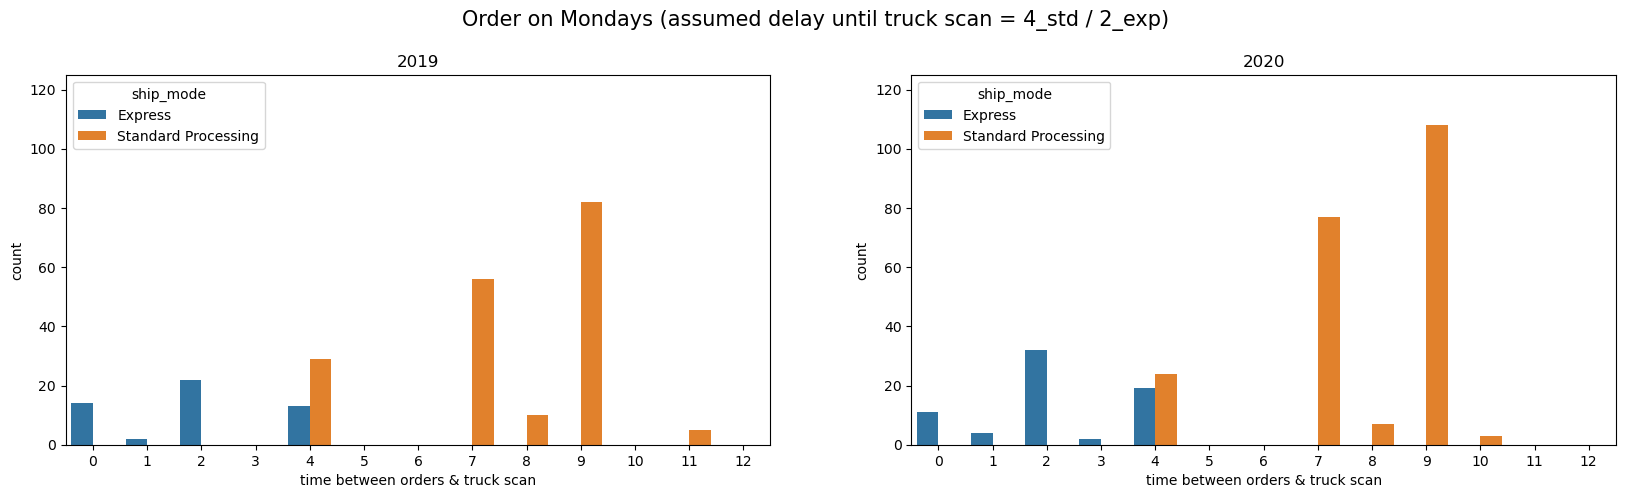

In [200]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Order on Mondays (assumed delay until truck scan = 4_std / 2_exp)", fontsize=15)
plt.subplots_adjust(top=0.85)

fig = sns.countplot(x=process.query('order_weekday == 0 and order_year == 2019')['delta_order_truck'], hue=process["ship_mode"], ax=ax[0], order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2019")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,125)

fig = sns.countplot(x=process.query('order_weekday == 0 and order_year == 2020')['delta_order_truck'], hue=process["ship_mode"],ax=ax[1], order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2020")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,125);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


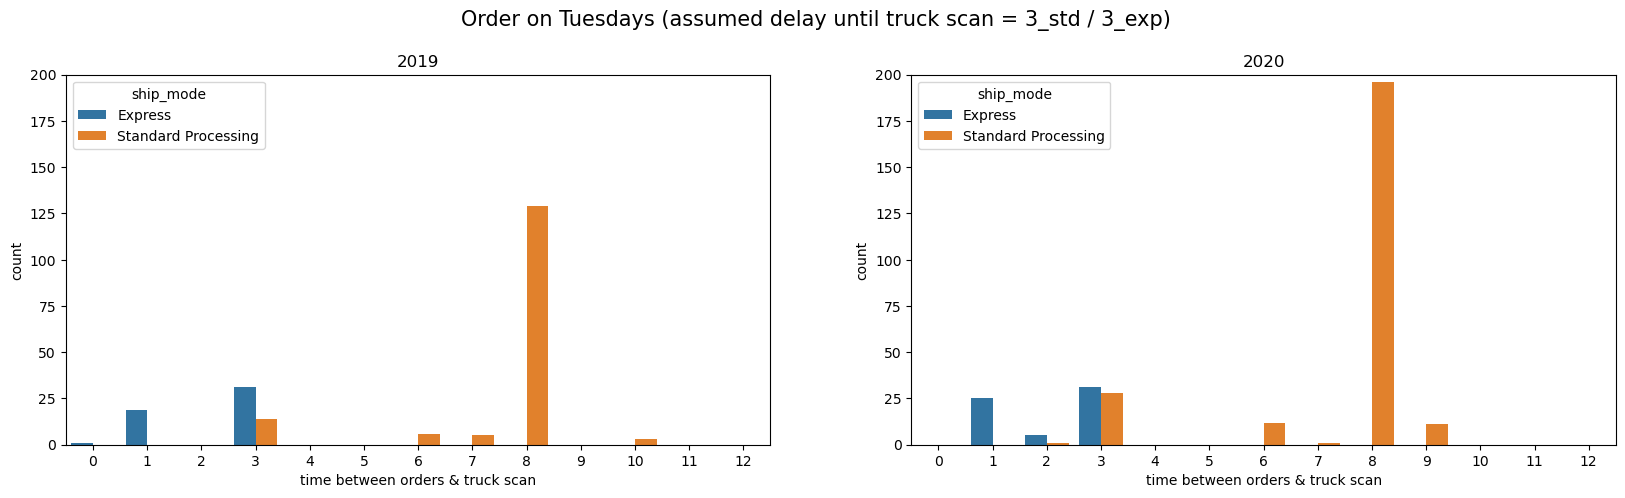

In [201]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Order on Tuesdays (assumed delay until truck scan = 3_std / 3_exp)", fontsize=15)
plt.subplots_adjust(top=0.85)
plt.legend(loc='upper left')

fig = sns.countplot(x=process.query('order_weekday == 1 and order_year == 2019')["delta_order_truck"],
                    hue=process["ship_mode"], 
                    ax=ax[0], 
                    order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2019")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,200)


fig = sns.countplot(x=process.query('order_weekday == 1 and order_year == 2020')["delta_order_truck"], hue=process["ship_mode"],ax=ax[1], order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2020")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,200);

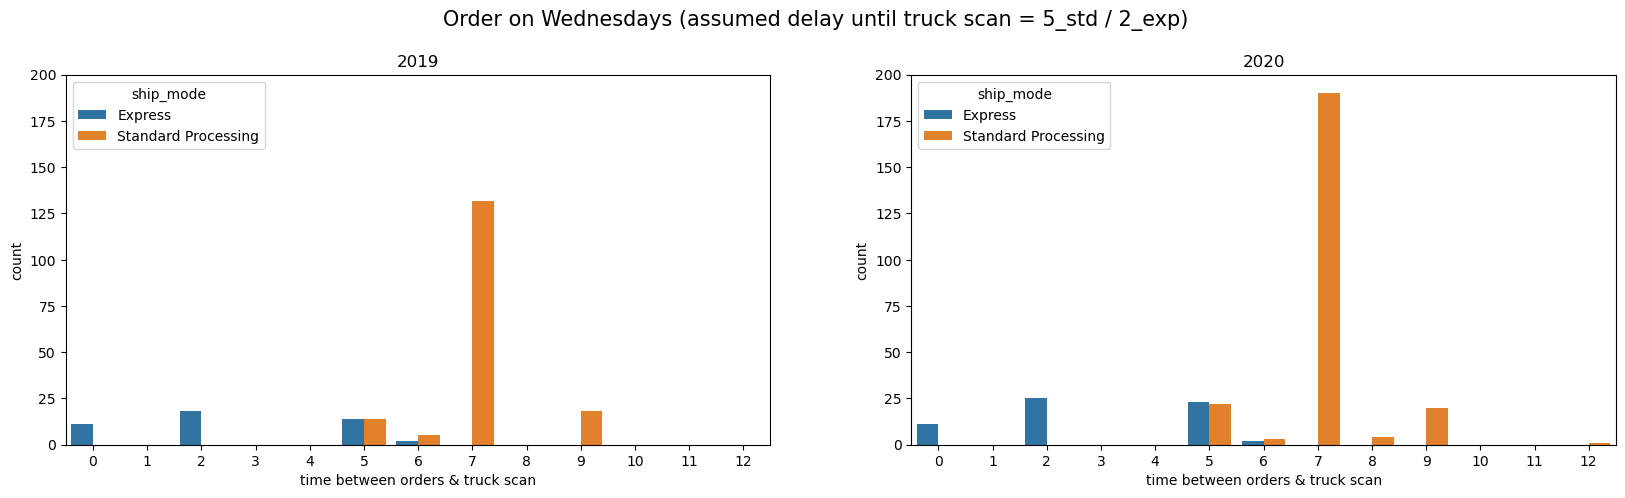

In [203]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Order on Wednesdays (assumed delay until truck scan = 5_std / 2_exp)", fontsize=15)
plt.subplots_adjust(top=0.85)

fig = sns.countplot(x=process.query('order_weekday == 2 and order_year == 2019')["delta_order_truck"], hue=process["ship_mode"],ax=ax[0],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2019")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,200)

fig = sns.countplot(x=process.query('order_weekday == 2 and order_year == 2020')["delta_order_truck"], hue=process["ship_mode"],ax=ax[1],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2020")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,200);

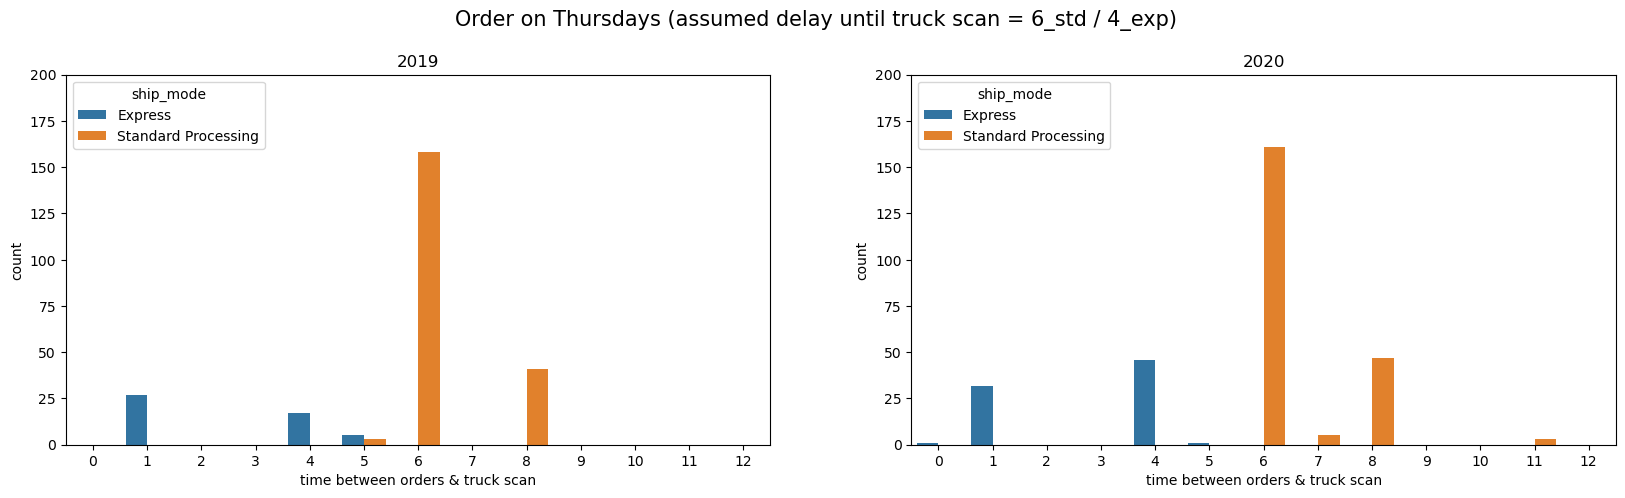

In [202]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Order on Thursdays (assumed delay until truck scan = 6_std / 4_exp)", fontsize=15)
plt.subplots_adjust(top=0.85)

fig = sns.countplot(x=process.query('order_weekday == 3 and order_year == 2019')["delta_order_truck"], hue=process["ship_mode"],ax=ax[0], order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2019")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,200)

fig = sns.countplot(x=process.query('order_weekday == 3 and order_year == 2020')["delta_order_truck"], hue=process["ship_mode"],ax=ax[1],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2020")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,200);

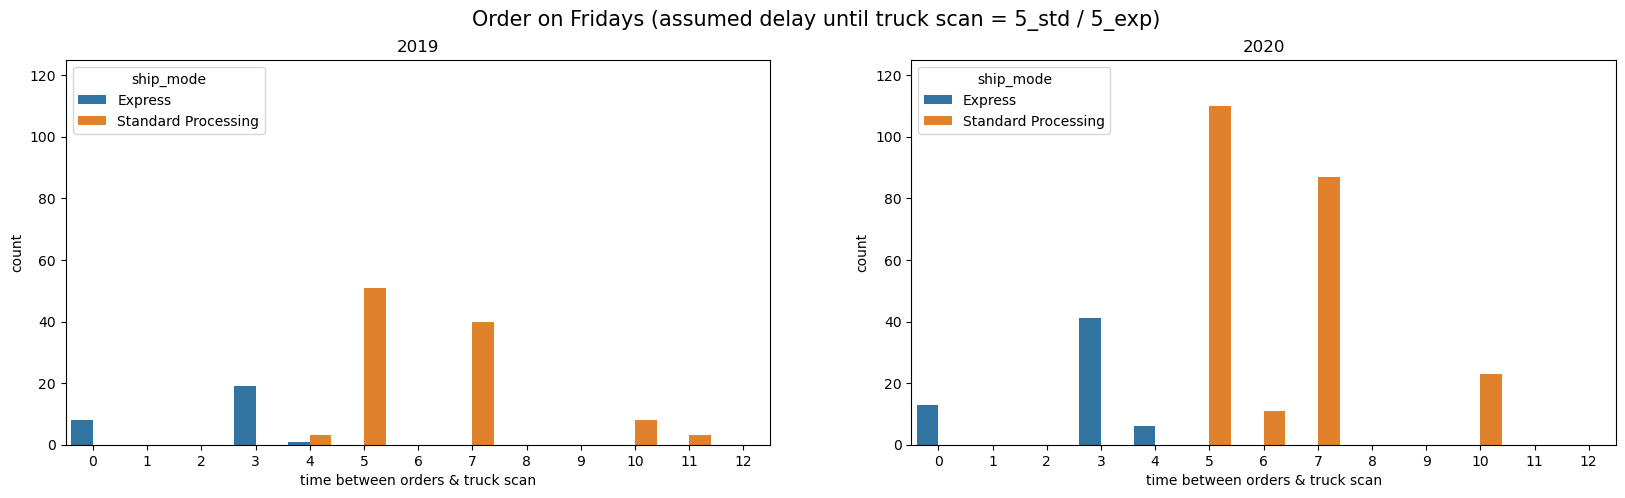

In [204]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Order on Fridays (assumed delay until truck scan = 5_std / 5_exp)", fontsize=15)

fig = sns.countplot(x=process.query('order_weekday == 4 and order_year == 2019')["delta_order_truck"],hue=process["ship_mode"], ax=ax[0],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2019")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,125)

fig = sns.countplot(x=process.query('order_weekday == 4 and order_year == 2020')["delta_order_truck"],hue=process["ship_mode"], ax=ax[1],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2020")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,125);

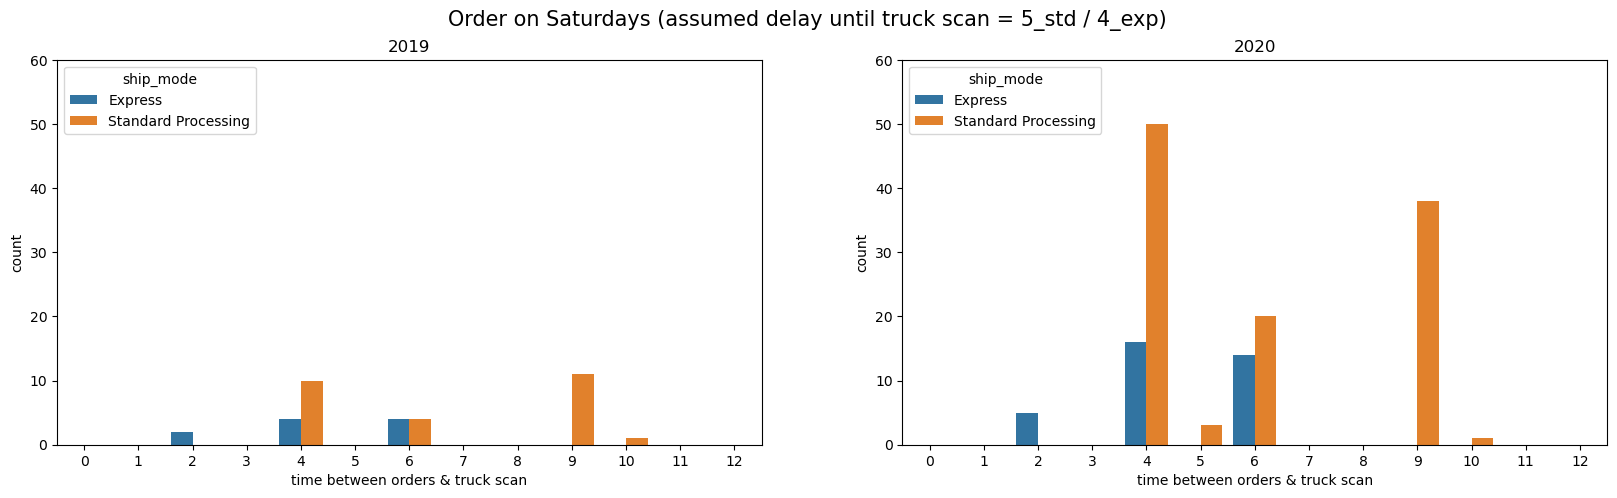

In [205]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Order on Saturdays (assumed delay until truck scan = 5_std / 4_exp)", fontsize=15)

fig = sns.countplot(x=process.query('order_weekday == 5 and order_year == 2019')["delta_order_truck"], hue=process["ship_mode"], ax=ax[0],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2019")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,60)

fig = sns.countplot(x=process.query('order_weekday == 5 and order_year == 2020')["delta_order_truck"], hue=process["ship_mode"], ax=ax[1],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2020")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,60);

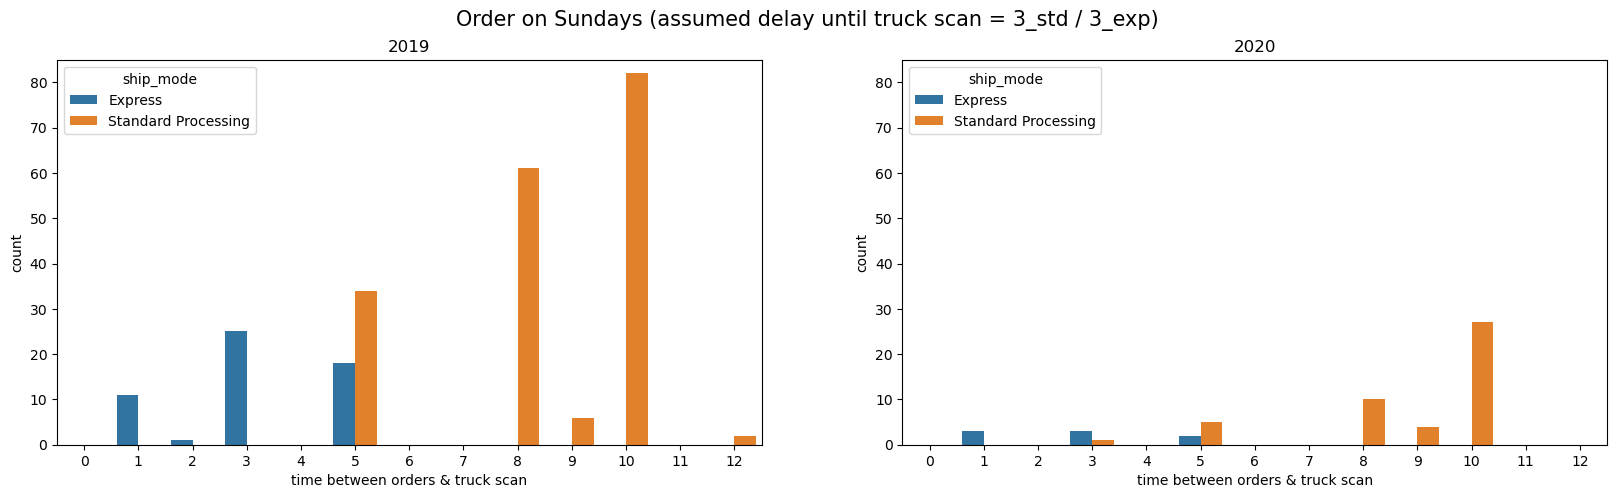

In [206]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Order on Sundays (assumed delay until truck scan = 3_std / 3_exp)", fontsize=15)

fig = sns.countplot(x=process.query('order_weekday == 6 and order_year == 2019')["delta_order_truck"], hue=process["ship_mode"], ax=ax[0],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2019")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,85)

fig = sns.countplot(x=process.query('order_weekday == 6 and order_year == 2020')["delta_order_truck"], hue=process["ship_mode"], ax=ax[1],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2020")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,85);

In [ ]:
#years = sorted(process_time.order_year.unique())
#f1 = sns.catplot(x="order_day", col="order_year", kind="count", col_wrap=4, data=process_time., hue="ship_mode", palette="pastel")
#f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=90);

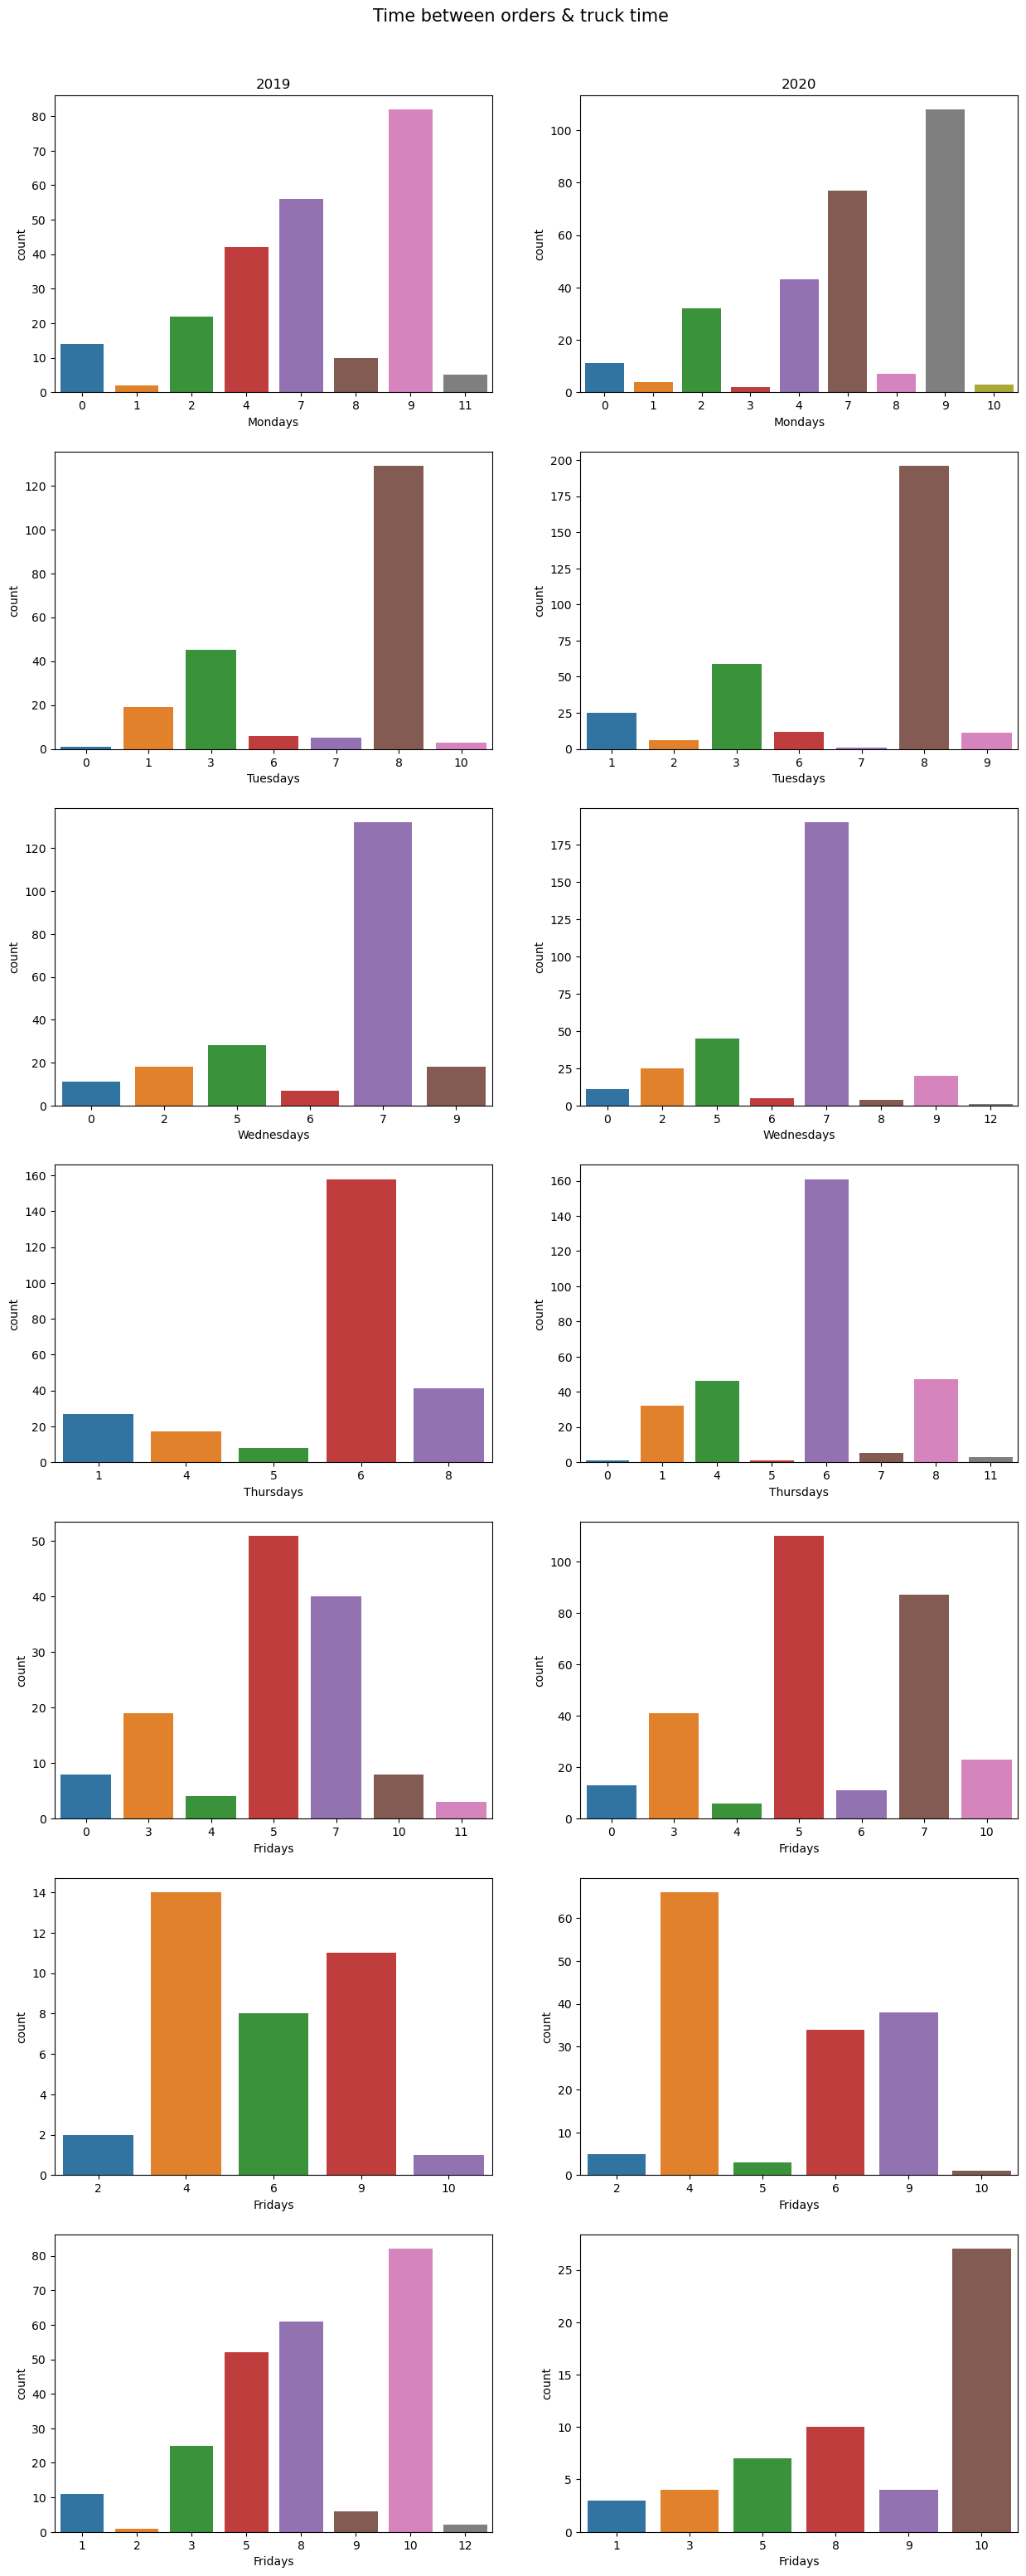

In [207]:
fig, ax = plt.subplots(7,2, figsize=(15,35))
#fig.tight_layout(h_pad=6)
fig.suptitle("Time between orders & truck time", fontsize=15)
#plt.subplots_adjust(wspace=0)
#plt.subplots_adjust(hspace=0)
plt.subplots_adjust(top=0.95)

fig_1 = sns.countplot(x=process.query('order_weekday == 0 and order_year == 2019')["delta_order_truck"], ax=ax[0,0])
fig_1.set_title("2019")
fig_1.set_xlabel("Mondays")

fig_2 =  sns.countplot(x=process.query('order_weekday == 0 and order_year == 2020')["delta_order_truck"], ax=ax[0,1])
fig_2.set_title("2020")
fig_2.set_xlabel("Mondays")

fig_3 = sns.countplot(x=process.query('order_weekday == 1 and order_year == 2019')["delta_order_truck"], ax=ax[1,0])
#fig_3.set_title("2019")
fig_3.set_xlabel("Tuesdays")

fig_4 =  sns.countplot(x=process.query('order_weekday == 1 and order_year == 2020')["delta_order_truck"], ax=ax[1,1])
#fig_4.set_title("2020")
fig_4.set_xlabel("Tuesdays");

fig_5 = sns.countplot(x=process.query('order_weekday == 2 and order_year == 2019')["delta_order_truck"], ax=ax[2,0])
#fig_5.set_title("2019")
fig_5.set_xlabel("Wednesdays")

fig_6 =  sns.countplot(x=process.query('order_weekday == 2 and order_year == 2020')["delta_order_truck"], ax=ax[2,1])
#fig_6.set_title("2020")
fig_6.set_xlabel("Wednesdays");

fig_7 = sns.countplot(x=process.query('order_weekday == 3 and order_year == 2019')["delta_order_truck"], ax=ax[3,0])
#fig_7.set_title("2019")
fig_7.set_xlabel("Thursdays")

fig_8 =  sns.countplot(x=process.query('order_weekday == 3 and order_year == 2020')["delta_order_truck"], ax=ax[3,1])
#fig_8.set_title("2020")
fig_8.set_xlabel("Thursdays");

fig_9 = sns.countplot(x=process.query('order_weekday == 4 and order_year == 2019')["delta_order_truck"], ax=ax[4,0])
#fig_9.set_title("2019")
fig_9.set_xlabel("Fridays")

fig_10 =  sns.countplot(x=process.query('order_weekday == 4 and order_year == 2020')["delta_order_truck"], ax=ax[4,1])
#fig_10.set_title("2020")
fig_10.set_xlabel("Fridays");

fig_11 = sns.countplot(x=process.query('order_weekday == 5 and order_year == 2019')["delta_order_truck"], ax=ax[5,0])
fig_11.set_xlabel("Fridays")

fig_12 =  sns.countplot(x=process.query('order_weekday == 5 and order_year == 2020')["delta_order_truck"], ax=ax[5,1])
fig_12.set_xlabel("Fridays");

fig_13 = sns.countplot(x=process.query('order_weekday == 6 and order_year == 2019')["delta_order_truck"], ax=ax[6,0])
fig_13.set_xlabel("Fridays")

fig_14 =  sns.countplot(x=process.query('order_weekday == 6 and order_year == 2020')["delta_order_truck"], ax=ax[6,1])
fig_14.set_xlabel("Fridays");

# 1. try to find the bad product
### results aren't sufficient because used DataFrame does not have all possible Product_IDs in it

In [ ]:
bad_product = orders_in2.merge(truck, how='left', on='order_id')

In [ ]:
bad_product.dropna(axis=0,subset="on_truck_scan_date", inplace=True)

In [ ]:
bad_product["order_weekday"] = bad_product["order_date"].dt.dayofweek
bad_product["on_truck_weekday"] = bad_product["on_truck_scan_date"].dt.dayofweek
bad_product["order_year"] = bad_product["order_date"].dt.year

In [ ]:
bad_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 5008
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            3002 non-null   object        
 1   order_date          3002 non-null   datetime64[ns]
 2   category            3002 non-null   object        
 3   product_id          3002 non-null   object        
 4   on_truck_scan_date  3002 non-null   datetime64[ns]
 5   ship_mode           3002 non-null   object        
 6   order_weekday       3002 non-null   int64         
 7   on_truck_weekday    3002 non-null   int64         
 8   order_year          3002 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 234.5+ KB


In [ ]:
bad_product["delta_order_truck"] = bad_product["on_truck_scan_date"] - bad_product["order_date"]
bad_product['delta_order_truck'] = bad_product['delta_order_truck'].astype('timedelta64[D]')

In [ ]:
bad_product.head()

,order_id,order_date,category,product_id,on_truck_scan_date,ship_mode,order_weekday,on_truck_weekday,order_year,delta_order_truck
0,CA-2019-121755,2019-01-16,Special Projects Muesil,TEC-AC-10003027,2019-01-23,Standard Processing,2,2,2019,7.0
1,CA-2019-118255,2019-03-11,Special Projects Muesil,TEC-AC-10000171,2019-03-13,Express,0,2,2019,2.0
2,CA-2019-169194,2019-06-20,Special Projects Muesil,TEC-AC-10002167,2019-06-26,Standard Processing,3,2,2019,6.0
3,CA-2019-111682,2019-06-17,Special Projects Muesil,TEC-AC-10002167,2019-06-19,Express,0,2,2019,2.0
5,CA-2020-155558,2020-10-26,Special Projects Muesil,TEC-AC-10001998,2020-11-04,Standard Processing,0,2,2020,9.0


In [ ]:
bad_product.product_id.unique()

array(['TEC-AC-10003027', 'TEC-AC-10000171', 'TEC-AC-10002167', ...,
       'FUR-CH-10004698', 'FUR-CH-10000665', 'FUR-CH-10003981'],
      dtype=object)

In [ ]:
bad_product.product_id.max()

'TEC-PH-10004977'

In [ ]:
bad_product.query("product_id == 'TEC-PH-10004977'")

,order_id,order_date,category,product_id,on_truck_scan_date,ship_mode,order_weekday,on_truck_weekday,order_year,delta_order_truck
2557,CA-2019-117590,2019-12-08,Special Projects Muesil,TEC-PH-10004977,2019-12-11,Express,6,2,2019,3.0
2795,CA-2020-122196,2020-09-22,Special Projects Muesil,TEC-PH-10004977,2020-09-25,Express,1,4,2020,3.0


In [ ]:
bad_product.product_id.value_counts().unique()

array([14,  8,  7,  6,  5,  4,  3,  2,  1])

In [ ]:
a = bad_product.product_id.value_counts()
b = a.value_counts()
print(b)

1     574
2     452
3     243
4     114
5      32
6      19
7       5
8       2
14      1
Name: product_id, dtype: int64


In [ ]:
category = bad_product.groupby("category")
cate = category["product_id"].count()
cate

category
Power Muesli               1846
Special Projects Muesil     759
Toasted Muesli              397
Name: product_id, dtype: int64

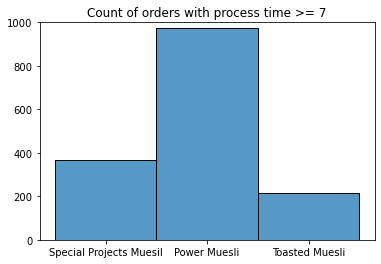

In [ ]:
bad_cat = bad_product.query("delta_order_truck >= 7")
#fig.tight_layout(h_pad=6)
fig = sns.histplot(data=bad_cat, x= bad_cat["category"])
fig.set_title("Count of orders with process time >= 7", fontsize=12)
fig.set_xlabel(xlabel="")
fig.set_ylabel(ylabel="")
fig.set_ylim(0,1000);

In [ ]:
bad_mon = bad_product.query("delta_order_truck >= 7 and order_weekday == 0")
bad_tue = bad_product.query("delta_order_truck >= 7 and order_weekday == 1")
bad_wed = bad_product.query("delta_order_truck >= 7 and order_weekday == 2")
bad_thu = bad_product.query("delta_order_truck >= 7 and order_weekday == 3")
bad_fri = bad_product.query("delta_order_truck >= 7 and order_weekday == 4")
bad_sat = bad_product.query("delta_order_truck >= 7 and order_weekday == 5")
bad_sun = bad_product.query("delta_order_truck >= 7 and order_weekday == 6")

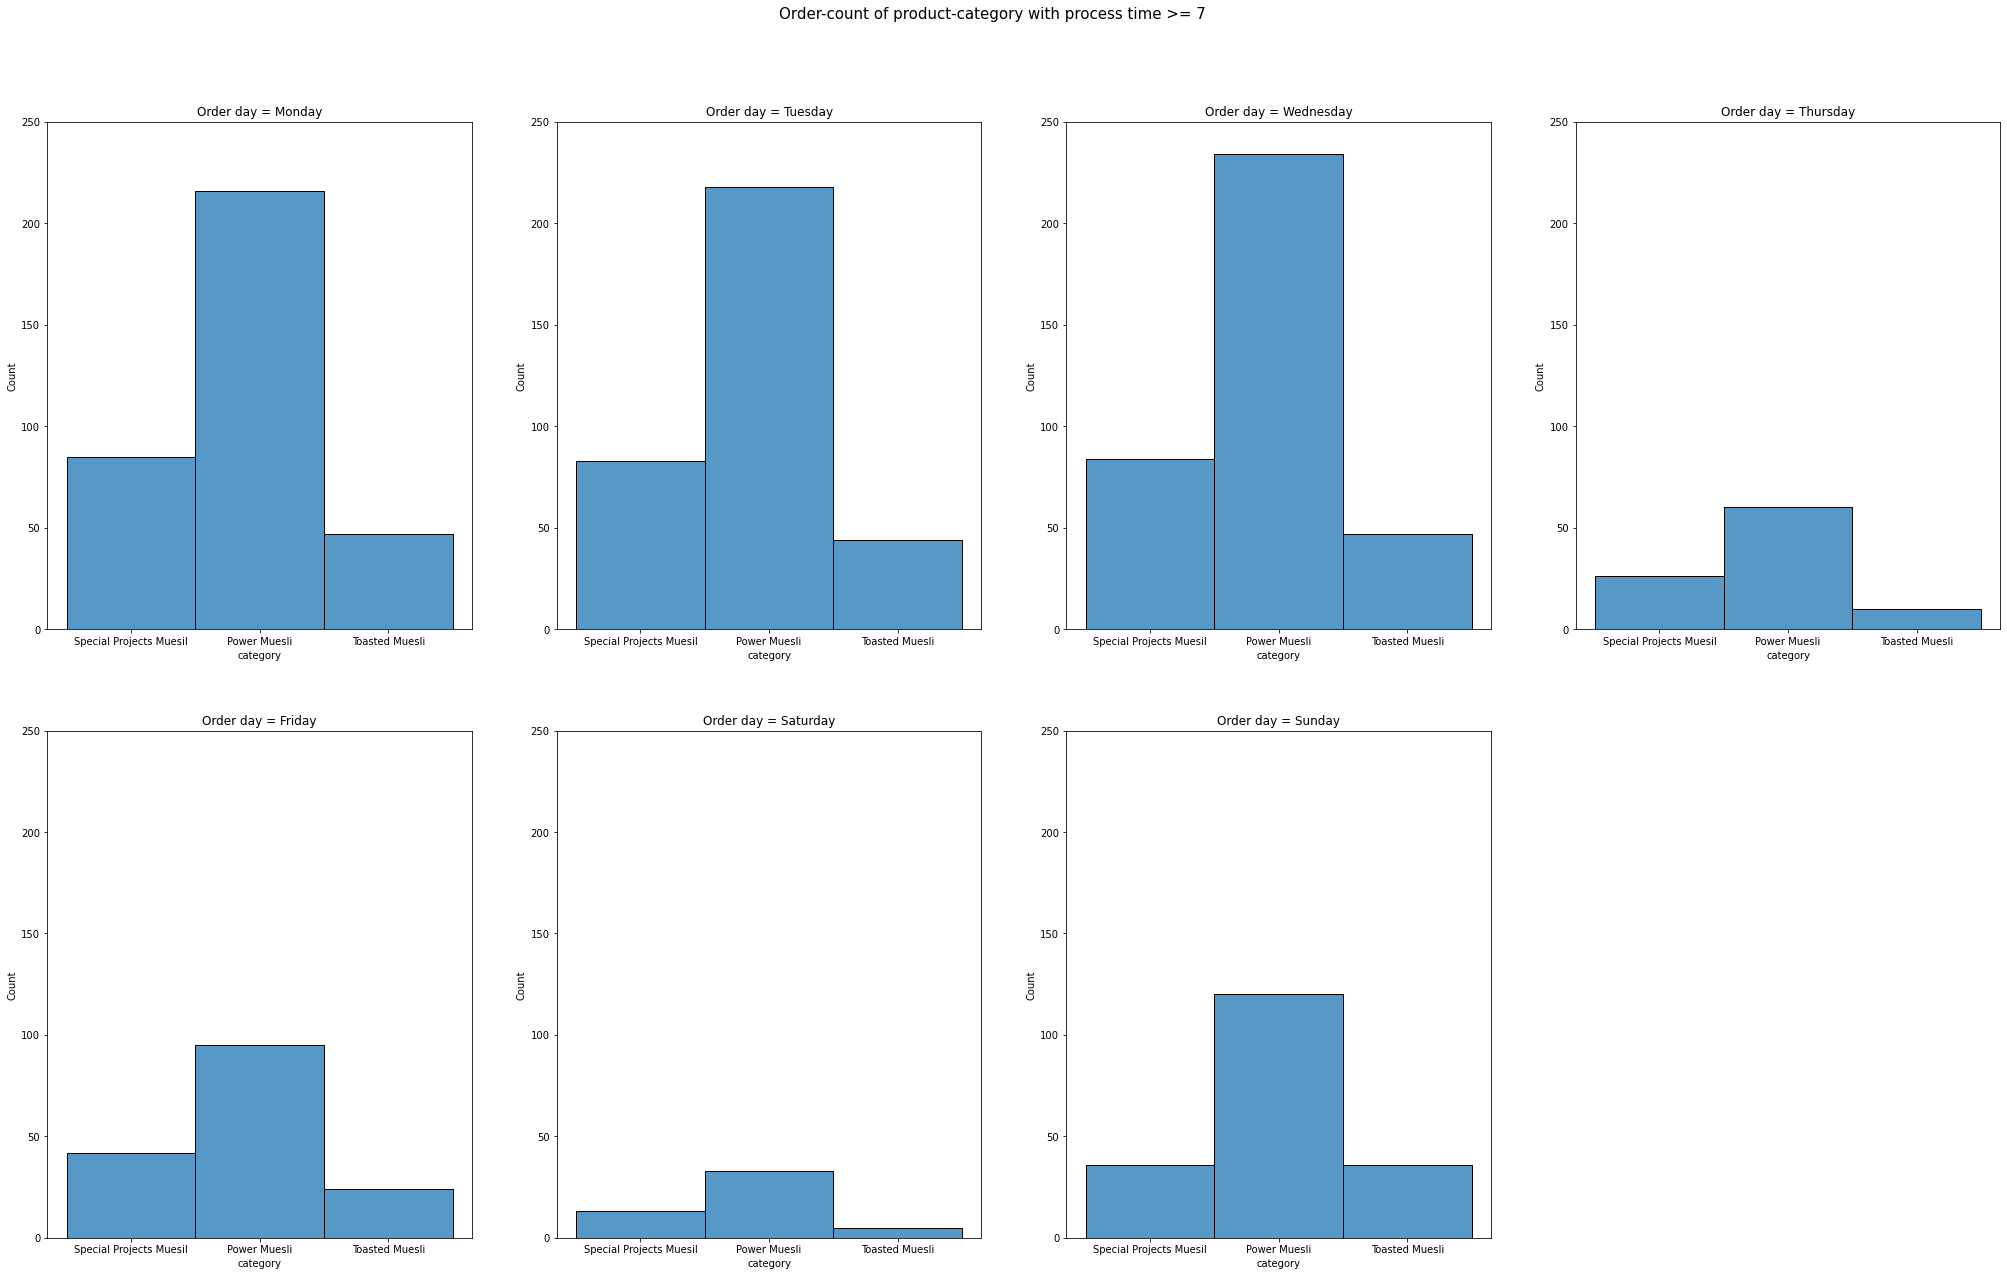

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(35,20))
#fig.tight_layout(h_pad=6)
fig.suptitle("Order-count of product-category with process time >= 7", fontsize=15)
#plt.subplots_adjust(wspace=0)
#plt.subplots_adjust(hspace=0)
plt.subplots_adjust(top=0.9)

fig = sns.histplot(data=bad_mon, x= bad_mon["category"], ax=ax[0,0])
fig.set_title("Order day = Monday")
fig.set_ylim(0,250);

fig = sns.histplot(data=bad_tue, x= bad_tue["category"], ax=ax[0,1])
fig.set_title("Order day = Tuesday")
fig.set_ylim(0,250);

fig = sns.histplot(data=bad_wed, x= bad_wed["category"], ax=ax[0,2])
fig.set_title("Order day = Wednesday")
fig.set_ylim(0,250);

fig = sns.histplot(data=bad_thu, x= bad_thu["category"], ax=ax[0,3])
fig.set_title("Order day = Thursday")
fig.set_ylim(0,250);

fig = sns.histplot(data=bad_fri, x= bad_fri["category"], ax=ax[1,0])
fig.set_title("Order day = Friday")
fig.set_ylim(0,250);

fig = sns.histplot(data=bad_sat, x= bad_sat["category"], ax=ax[1,1])
fig.set_title("Order day = Saturday")
fig.set_ylim(0,250);

fig = sns.histplot(data=bad_sun, x= bad_sun["category"], ax=ax[1,2])
fig.set_title("Order day = Sunday")
fig.set_ylim(0,250);

fig = sns.histplot(ax=ax[1,3])
ax[1,3].axis("off");


# 2. Try to find product causing delays
### Creating new DataFrame (because process_time just has 3002 rows and a lot of Product_Ids have been removed because they had no on_truck date)
#### not finished -> starting new Notebook

In [ ]:
import numpy as np

In [ ]:
orders_badprod = pd.read_csv("data/muesli_raw_orders.csv", header=1)

In [ ]:
cols = orders_badprod.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
orders_badprod.columns = cols

In [ ]:
orders_badprod.columns = orders_badprod.columns.str.lower()

In [ ]:
orders_in2 = orders_badprod[["order_id", "order_date","category", "product_id"]]

In [ ]:
orders_in2['order_date'] = pd.to_datetime(orders_in2['order_date'], format="%d/%m/%Y")

In [ ]:
bad_product2 = orders_in2.set_index("order_id").join(truck.set_index("order_id"), rsuffix="_process")
bad_product2.dropna(subset="on_truck_scan_date", axis=0, inplace=True)
bad_product2

In [ ]:
bad_product2.info()

In [ ]:
bad_product2["order_weekday"] = bad_product2["order_date"].dt.dayofweek
bad_product2["on_truck_weekday"] = bad_product2["on_truck_scan_date"].dt.dayofweek
bad_product2["order_year"] = bad_product2["order_date"].dt.year

In [ ]:
bad_product2["delta_order_truck"] = bad_product2["on_truck_scan_date"] - bad_product2["order_date"]
bad_product2['delta_order_truck'] = bad_product2['delta_order_truck'].astype('timedelta64[D]')

In [ ]:
bad_product2.product_id.nunique()

1689

# Creating new DataFrame for Linear Regression

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df = orders[["order_id", "quantity", "sales","category", "discount", "profit"]]

In [ ]:
regress = df.merge(process_time, how="left", on="order_id")
regress.dropna(axis=0,subset="on_truck_scan_date", inplace=True)

In [ ]:
regress.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 5008
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            3002 non-null   object        
 1   quantity            3002 non-null   int64         
 2   sales               3002 non-null   float64       
 3   category            3002 non-null   object        
 4   discount            3002 non-null   float64       
 5   profit              3002 non-null   float64       
 6   order_date          3002 non-null   datetime64[ns]
 7   on_truck_scan_date  3002 non-null   datetime64[ns]
 8   ship_mode           3002 non-null   object        
 9   delta_order_truck   3002 non-null   float64       
 10  order_weekday       3002 non-null   float64       
 11  on_truck_weekday    3002 non-null   float64       
 12  order_year          3002 non-null   float64       
dtypes: datetime64[ns](2), float64(7), int64(1), obje

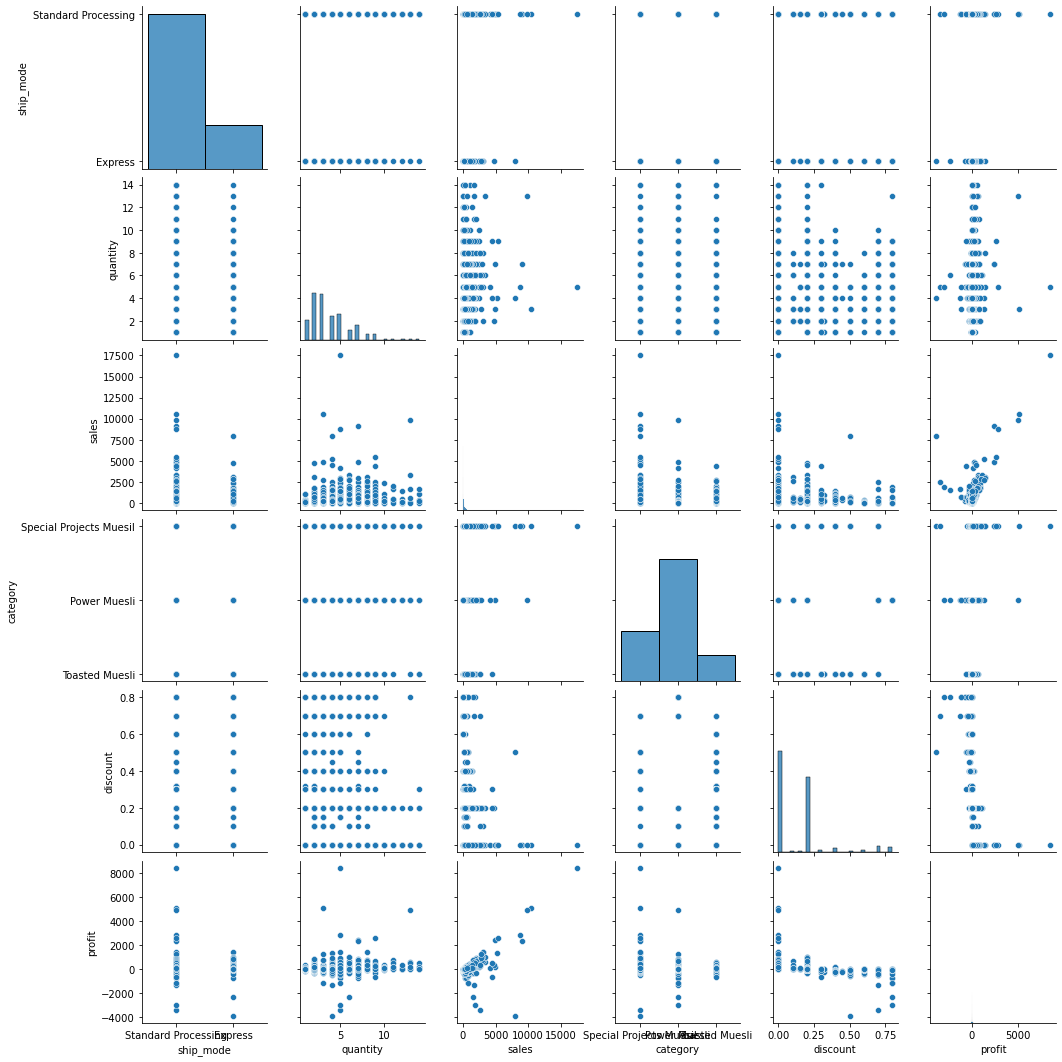

In [ ]:
sns.pairplot(regress, vars=["ship_mode", "quantity", "sales","category", "discount", "profit"]);

In [ ]:
regress.corr()

,quantity,sales,discount,profit,delta_order_truck,order_weekday,on_truck_weekday,order_year
quantity,1.000000,0.181462,-0.019757,0.103892,0.039599,-0.007870,0.041690,-0.006874
sales,0.181462,1.000000,-0.040008,0.650268,-0.000906,-0.041083,0.029617,-0.020502
discount,-0.019757,-0.040008,1.000000,-0.201294,-0.008778,-0.030647,0.010244,-0.001221
profit,0.103892,0.650268,-0.201294,1.000000,0.014848,-0.014566,0.030674,-0.039933
delta_order_truck,0.039599,-0.000906,-0.008778,0.014848,1.000000,0.007351,-0.129763,-0.033670
order_weekday,-0.007870,-0.041083,-0.030647,-0.014566,0.007351,1.000000,0.009519,-0.081206
on_truck_weekday,0.041690,0.029617,0.010244,0.030674,-0.129763,0.009519,1.000000,-0.002830
order_year,-0.006874,-0.020502,-0.001221,-0.039933,-0.033670,-0.081206,-0.002830,1.000000
